<a href="https://colab.research.google.com/github/Risaarista/Python-pertemuan-10/blob/main/Risa_Arista_Adelia_Tugas_Python_Mgg_ke_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Risa Arista Adelia

1101184354

Tugas Python Minggu ke-14

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [45]:
#FUNGSI UNTUK DAYA TERIMA
def Prx(ptx,pl,gtx,grx):
 prx = 10**(((10*(np.log10(ptx*1000))) - pl + gtx + grx)/10)
 return prx

In [46]:
#FUNGSI UNTUK SNR
def snr(prx,bw):

  No = -174 + 10*(np.log10(bw))
  Sn = prx / (10**(No/10))

  return Sn

In [47]:
def KpstsSel(SNR,BW):
  ks = BW*np.log2(1+SNR)
  return ks

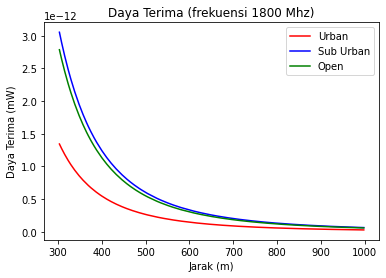

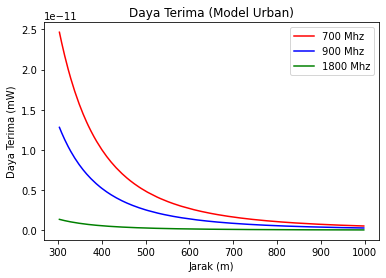

In [48]:
f = 1800 #MHz
loc ='urban'
tower = 80 #m
user = 1.5 #m
dmin = 300 #m
dmax = 1000 #m
N = 200 #titik
d = np.random.randint(dmin,dmax,N)

f = 1800 #MHz
loc1 ='suburban'
tower = 80 #m
user = 1.5 #m
dmin = 300 #m
dmax = 1000 #m
N = 200 #titik
d = np.random.randint(dmin,dmax,N)

f = 1800 #MHz
loc2 ='open'
tower = 80 #m
user = 1.5 #m
dmin = 300 #m
dmax = 1000 #m
N = 200 #titik
d = np.random.randint(dmin,dmax,N)


PlUrban = cos(f,loc,tower,user,d)
PlSubUrban = cos(f,loc1,tower,user,d)
PlOpen = cos(f,loc2,tower,user,d)


PRXURBAN = Prx(30,PlUrban,10,2)
PRXSUBURBAN = Prx(30,PlSubUrban,10,2)
PRXOPEN = Prx(30,PlOpen,10,2)

#sorting
d_sort = d[np.argsort(d)]
Urban_sort = PRXURBAN[np.argsort(d)]
SubUrban_sort = PRXSUBURBAN[np.argsort(d)]
Open_sort = PRXOPEN[np.argsort(d)]

plt.figure()
plt.plot(d_sort,Urban_sort,'r',label='Urban' )
plt.plot(d_sort,SubUrban_sort,'b',label='Sub Urban' )
plt.plot(d_sort,Open_sort,'g', label='Open')
plt.legend()
plt.title('Daya Terima (frekuensi 1800 Mhz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()


f1 = 700 #Mhz
f2 = 900 #Mhz
f3 = 1800 #MHz
loc3 ='urban'
tower = 80 #m
user = 1.5 #m
dmin = 300 #m
dmax = 1000 #m
N = 200 #titik


LpUrbana = cos(f1,loc3,tower,user,d)
LpUrbanb = cos(f2,loc3,tower,user,d)
LpUrbanc = cos(f3,loc3,tower,user,d)

PRXURB1 = Prx(30,LpUrbana,10,2)
PRXURB2 = Prx(30,LpUrbanb,10,2)
PRXURB3 = Prx(30,LpUrbanc,10,2)

#sorting
d_sort = d[np.argsort(d)]
Urban_sort1 = PRXURB1[np.argsort(d)]
Urban_sort2 = PRXURB2[np.argsort(d)]
Urban_sort3 = PRXURB3[np.argsort(d)]

plt.figure()
plt.plot(d_sort,Urban_sort1,'r',label='700 Mhz' )
plt.plot(d_sort,Urban_sort2,'b',label='900 Mhz')
plt.plot(d_sort,Urban_sort3,'g', label='1800 Mhz')
plt.legend()
plt.title('Daya Terima (Model Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

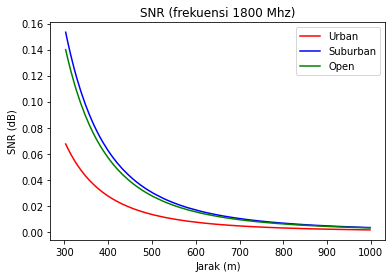

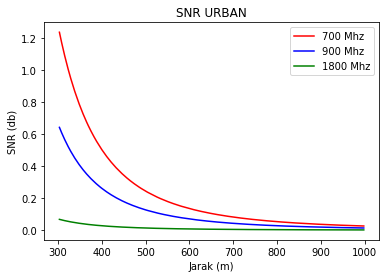

In [49]:
#SNR
SNRURBAN = snr(Urban_sort,5000000) #(dayaterima(numerik),bandwidth(Hz))
SNROPEN = snr(Open_sort,5000000)
SNRSUBURBAN = snr(SubUrban_sort,5000000)

plt.figure()
plt.plot(d_sort,SNRURBAN,'r',label='Urban' )
plt.plot(d_sort,SNRSUBURBAN,'b',label='Suburban')
plt.plot(d_sort,SNROPEN,'g', label='Open')
plt.legend()
plt.title('SNR (frekuensi 1800 Mhz)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()


SNRURBAN1 = snr(Urban_sort1,5000000)
SNRURBAN2 = snr(Urban_sort2,5000000)
SNRURBAN3 = snr(Urban_sort3,5000000)

plt.figure()
plt.plot(d_sort,SNRURBAN1,'r',label='700 Mhz' )
plt.plot(d_sort,SNRURBAN2,'b',label='900 Mhz')
plt.plot(d_sort,SNRURBAN3,'g', label='1800 Mhz')
plt.legend()
plt.title('SNR URBAN')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (db)')
plt.show()

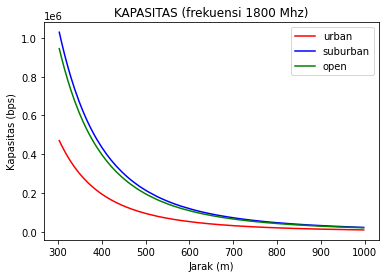

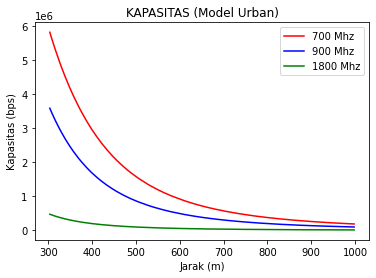

In [50]:
#KAPASITAS SELULER
KapSelUrban = KpstsSel (SNRURBAN,5000000)
KapSelSubUrban = KpstsSel (SNRSUBURBAN,5000000)
KapSelOpen = KpstsSel (SNROPEN,5000000)

plt.figure()
plt.plot(d_sort,KapSelUrban,'r',label='urban' )
plt.plot(d_sort,KapSelSubUrban,'b',label='suburban')
plt.plot(d_sort,KapSelOpen,'g', label='open')
plt.legend()
plt.title('KAPASITAS (frekuensi 1800 Mhz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()


KapSelUrban1 = KpstsSel (SNRURBAN1,5000000)
KapSelUrban2 = KpstsSel (SNRURBAN2,5000000)
KapSelUrban3 = KpstsSel (SNRURBAN3,5000000)

plt.figure()
plt.plot(d_sort,KapSelUrban1,'r',label='700 Mhz' )
plt.plot(d_sort,KapSelUrban2,'b',label='900 Mhz')
plt.plot(d_sort,KapSelUrban3,'g', label='1800 Mhz')
plt.legend()
plt.title('KAPASITAS (Model Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()